# Single scattering albedo timeseries: 

In this Jupyter Notebook we plot the following figures:

- ***Figure S9***: Timeseries of the absorption coefficient, scattering coefficient and single scattering albedo

In [1]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\GitHub\Correction_Factors_Absorption')

import Corrections_factors_absorption_functions as fu_cf_abs

%load_ext autoreload
%autoreload 2

loadpath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'
savepath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'
Mie = False

import pandas as pd 
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import glob
from datetime import datetime, timedelta
from sklearn import datasets, linear_model
import os
from matplotlib.ticker import AutoMinorLocator

In [2]:
def save_plot(fig, path, folder='', 
              name='default_name', formate=".jpeg", dpi=300):
    folders = glob.glob(path)
    print(folders)
    if folder not in folders:
        print("make folder")
        os.makedirs(path+"\\"+folder, exist_ok=True)
    fig.savefig(path+"\\"+folder+"\\"+str(name)+str(formate), bbox_inches='tight', dpi=dpi)
    print("saved as: "+str(path+"\\"+folder+"\\"+str(name)+str(formate)))

In [3]:
print("\nNew PSAP:")
df_newpsap =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\New_PSAP', filename='New_PSAP', formatdata=".dat")
df_newpsapraw =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\New_PSAP', filename='RAW_NEW_PSAP_cleaned', formatdata=".dat")

print("\nOld PSAP:")
df_oldpsap =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP', filename='Old_PSAP', formatdata=".dat")
df_oldpsapraw =  fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP', filename='RAW_Old_PSAP_cleaned', formatdata=".dat")

#off day required 
df_oldpsap = fu_cf_abs.day_offset(df_oldpsap, number_of_days=1, split_time='2012-06-15 16:05:00', add=True, substract=False)
df_oldpsapraw = fu_cf_abs.day_offset(df_oldpsapraw, number_of_days=1, split_time='2012-06-15 16:05:00', add=True, substract=False)

df_oldPSAPEBAS = fu_cf_abs.load_df(loadpath, extrapath=r'absorption\Old_PSAP_EBAS', filename='PSAP_EBAS', formatdata=".dat" )
df_oldPSAPEBAS = df_oldPSAPEBAS.rename(columns={'aerosol_absorption_coefficient':'abs525'})

print("\nMAAP:") #df_MAAP_2014_2020_hourly_mean_abs #'hourly_MAAP_mean_extremes'
df_MAAP = fu_cf_abs.load_df(loadpath, extrapath=r'absorption\MAAP', filename='hourly_MAAP_mean_extremes', formatdata=".dat")


New PSAP:
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\New_PSAP\New_PSAP.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\New_PSAP\RAW_NEW_PSAP_cleaned.dat

Old PSAP:
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\Old_PSAP\Old_PSAP.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\Old_PSAP\RAW_Old_PSAP_cleaned.dat
Day added: 1 from 2012-06-15 16:05:00
Day added: 1 from 2012-06-15 16:05:00
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\Old_PSAP_EBAS\PSAP_EBAS.dat

MAAP:
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\MAAP\hourly_MAAP_mean_extremes.dat


In [4]:
df_oldpsapEBAS637 = fu_cf_abs.convert_wavelength(df_oldPSAPEBAS,lambda1=525,lambda2=637,abs_col='abs525',
                                                 use_constant=True)
df_oldpsap637 = fu_cf_abs.convert_wavelength(df_oldpsap,lambda1=525,lambda2=637,abs_col='abs525',
                                             use_constant=True)
df_newpsap637 = fu_cf_abs.convert_wavelength(df_newpsap,lambda1=525,lambda2=637,abs_col='abs525',
                                             use_constant=True)

AAE = 1.0 is used to convert between wavelengths for abs525
AAE = 1.0 is used to convert between wavelengths for abs525
AAE = 1.0 is used to convert between wavelengths for abs525


In [5]:
df_newpsap637_hourly = fu_cf_abs.hourly_resample(df_newpsap637, cols=['filter_num', 'abs637', 'scat550', 'Tr']) 
df_newpsap_maap = fu_cf_abs.mergedfs(df_MAAP, df_newpsap637_hourly) #merge
df_newpsap_maap = df_newpsap_maap[['absorption', 'abs637 mean']].copy()
df_newpsap_maap = df_newpsap_maap.rename({'absorption':'abs637_maap', 
                                          'abs637 mean':'abs637_newpsap'},
                                          axis=1) 

df_oldpsap637_hourly = fu_cf_abs.hourly_resample(df_oldpsap637, 
                                                cols=['filter_num', 'abs637', 'scat550', 'Tr', 'volume']) #hourly
df_oldpsap_newpsap = fu_cf_abs.mergedfs(df_newpsap637_hourly, df_oldpsap637_hourly) # merge
df_oldpsap_newpsap = df_oldpsap_newpsap[['abs637 mean_x', 'abs637 mean_y']].copy()
df_oldpsap_newpsap = df_oldpsap_newpsap.rename({'abs637 mean_x':'abs637_newpsap', 
                                                'abs637 mean_y':'abs637_oldpsap'},
                                                axis=1) 

Index(['filter_num mean', 'filter_num median', 'filter_num std',
       'filter_num var', 'abs637 mean', 'abs637 median', 'abs637 std',
       'abs637 var', 'scat550 mean', 'scat550 median', 'scat550 std',
       'scat550 var', 'Tr mean', 'Tr median', 'Tr std', 'Tr var'],
      dtype='object')
Index(['filter_num mean', 'filter_num median', 'filter_num std',
       'filter_num var', 'abs637 mean', 'abs637 median', 'abs637 std',
       'abs637 var', 'scat550 mean', 'scat550 median', 'scat550 std',
       'scat550 var', 'Tr mean', 'Tr median', 'Tr std', 'Tr var',
       'volume mean', 'volume median', 'volume std', 'volume var'],
      dtype='object')


Files come from 'Merge TSI and Ecotech data' in the Black carbon folder: 

In [6]:
def load_neph_data(filename="df_scat_TSI_ecotech_Mie_noLOD.dat", 
                   loadpath = "C:\\Users\\DominicHeslinRees\\Documents\\Analysis\\Neph\\", select_Mie=0):
    print("load from :"+str(loadpath))
    df_neph = pd.read_csv(loadpath+str(filename), index_col=0, parse_dates=True)
    df_neph = df_neph[df_neph.Mie == select_Mie].copy()
    return df_neph

In [7]:
def day_offset(df, number_of_days=1, split_time=None, add=True, substract=False):
    """Add or subtract days from index"""    
    print(len(df.index))
    if split_time != None: 
        before = df.loc[(df.index < pd.to_datetime(split_time))].index
        if add == True:
            print("Day added: "+str(number_of_days)+' from '+str(split_time))
            times = df.loc[(df.index >= pd.to_datetime(split_time))].index
            print(times[0])
            after = times + pd.DateOffset(days=number_of_days)
            print(after[0])
            df.index = list(before) + list(after)
        print(len(df.index))
        if substract == True:
            print("Day substracted: "+str(number_of_days)+' from '+str(split_time))
            after = df.loc[(df.index >= pd.to_datetime(split_time))].index - pd.DateOffset(days=number_of_days)
            df.index = list(before) + list(after) 
            
    if split_time == None:   
        if add == True:
            print("Day added: "+str(number_of_days))
            df.index = df.index + pd.DateOffset(days=number_of_days) #have to manually offset by a day
        if substract == True:
            print("Day substracted: "+str(number_of_days))
            df.index = df.index - pd.DateOffset(days=number_of_days) #have to manually offset by a day         
    return df

In [8]:
df_neph = load_neph_data(filename='df_scat_TSI_ecotech_Mie_noLOD.dat')
df_neph = df_neph[df_neph['Mie'] == 0]
df_neph = day_offset(df_neph, number_of_days=1, split_time='2018-01-01 00:00:00', add=False, substract=True)

load from :C:\Users\DominicHeslinRees\Documents\Analysis\Neph\
102446
102446
Day substracted: 1 from 2018-01-01 00:00:00


In [9]:
def merge_ssa(df_abs, df_neph, var='abs637 mean'):
    df = pd.merge(df_abs, df_neph[['scat637']], left_index=True, right_index=True, how='outer',)
    df['w0'] = df['scat637']/(df['scat637']+df[var])
    return df

In [10]:
def fancy(ax, fontsize=20):    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)    

# Exaime: 

In [11]:
def load_df(loadpath, extrapath=None, filename=None, formatdata=".dat", index_col=0):
    if extrapath is not None:
        print("loading: "+str(loadpath+'\\'+extrapath+'\\'+filename+formatdata))
        df = pd.read_csv(loadpath+'\\'+extrapath+'\\'+filename+formatdata, index_col=index_col, parse_dates=True,
                         low_memory=False)
    if extrapath is None:
        print("loading: "+str(loadpath+'\\'+filename+formatdata))
        df = pd.read_csv(loadpath+'\\'+filename+formatdata, index_col=index_col, parse_dates=True,
                         low_memory=False)        
    return df

In [12]:
df_abs = load_df(loadpath=r'C:\Users\DominicHeslinRees\Documents\Analysis\absorption\appended',                   
                       filename='oldpsap_newpsap_maap')

loading: C:\Users\DominicHeslinRees\Documents\Analysis\absorption\appended\oldpsap_newpsap_maap.dat


In [13]:
def quick_plot(df, var='abs_homogenised', ymax=30, add_labels=True, title=''):    
    fig, ax = plt.subplots(figsize=(20,6))

    ax.plot(df.index, df[var],'o', ms=1, mfc='none', mec='k', label='')
    
    if add_labels==True:
        xcoords = [df_oldpsap637_hourly.index[-1], df_newpsap637_hourly.index[-1], df_MAAP.index[-1]]
        labels = ['Old PSAP', 'New PSAP', 'MAAP']
        trans = ax.get_xaxis_transform()
        print("add labels:")
        for xc, label in zip(xcoords, labels):
            plt.axvline(x=xc, ls=':', label='line at x = {}'.format(xc), c='k', alpha=0.5)
            plt.text(xc, float(ymax), label, rotation=0, horizontalalignment='right', alpha=0.5,  fontsize=20)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
   
    ax.minorticks_on()
    ax.tick_params(labelsize=20, direction='in', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    ax.tick_params(which='minor', direction='in', length=4, color='k', width=1.3, bottom=True, top=False, left=True, right=False)
    ax.set_ylim(-2, ymax)
    ax.set_ylabel(title, fontsize=20)
    
    fancy(ax)
    
    plt.show()

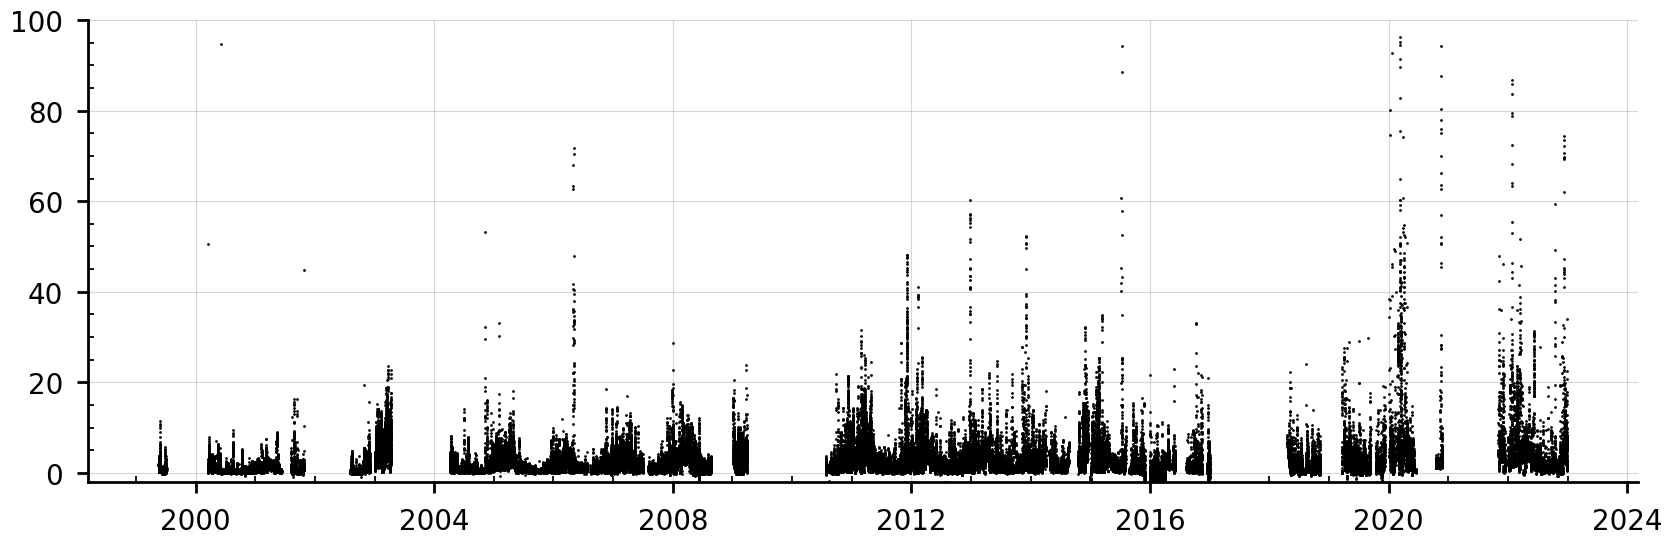

In [14]:
quick_plot(df_neph, 'scat637', add_labels=False, ymax=100)

In [15]:
df_abs_ssa = merge_ssa(df_abs, df_neph, var='abs637')

In [16]:
df_abs_ssa['month'] = df_abs_ssa.index.month
df_abs_ssa['year'] = df_abs_ssa.index.year
df_abs_ssa['year_month'] = (df_abs_ssa.index.year-df_abs_ssa.index.year.min())*12 + df_abs_ssa.index.month

In [17]:
df_abs_ssa_month = df_abs_ssa.groupby('year_month').median()

In [18]:
def fancy(ax, fontsize=20):    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)   
    
def add_datetime(df, start_year=1999, use_year=True):
    df['month'] = df.index%12
    df.loc[df.month == 0, 'month'] = 12
    df['month'] = df['month'].map("{:02}".format)
    
    if use_year == True:
        df['year'] = df['year'].astype(int)
    if use_year == False:
        df['year'] = (df.index/12).astype(int) + start_year
    
    df['day'] = "{:02d}".format(1)
    df['datetime'] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
    df = df.set_index('datetime')
    df = df.sort_index()
    return df

In [19]:
df_abs_ssa_month = add_datetime(df_abs_ssa_month, use_year=True)
df_abs_ssa_month = df_abs_ssa_month.resample('M').mean()

In [20]:
def create_SSA_abs_scat_plot(df_abs_ssa_month, fontsize = 20):    
    fig, ax1 = plt.subplots(1,1, figsize=(15,5))

    #ax1 = plt.subplot(1,1,1)
    p1, = ax1.plot(df_abs_ssa_month.index, df_abs_ssa_month['scat637'], marker='o', lw=0, c='b') 
    ax1.plot(df_abs_ssa_month.index, df_abs_ssa_month['scat637'], ls=':', c='b', alpha=.2) 
    ax1.set_ylabel('$\sigma_{\mathrm{sp}}$ [Mm$^{-1}$]', fontsize=fontsize)
    ax1.yaxis.label.set_color(p1.get_color())
    ax1.set_ylim(0, 10)

    ax2 = ax1.twinx()
    p2, = ax2.plot(df_abs_ssa_month.index, df_abs_ssa_month['abs637'], marker='o', lw=0, c='k')
    ax2.plot(df_abs_ssa_month.index, df_abs_ssa_month['abs637'], ls=':', c='b', alpha=.2) 
    ax2.set_ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]',  fontsize=fontsize)
    ax2.yaxis.label.set_color(p2.get_color())
    ax2.set_ylim(0, 3)

    for label in ax1.yaxis.get_majorticklabels():
        label.set_fontsize(fontsize)
    for label in ax1.xaxis.get_majorticklabels():
        label.set_fontsize(fontsize)
    for label in ax2.yaxis.get_majorticklabels():
        label.set_fontsize(fontsize)

    twin_extra = ax1.twinx()
    twin_extra.spines.right.set_position(("axes", 1.15))
    p3, = twin_extra.plot(df_abs_ssa_month.index, df_abs_ssa_month['w0'], marker='o', lw=0, c='y')
    twin_extra.plot(df_abs_ssa_month.index, df_abs_ssa_month['w0'], ls=':', c='y', alpha=.5)
    twin_extra.yaxis.label.set_color(p3.get_color())
    twin_extra.set_ylabel('SSA [-]',  fontsize=fontsize)
    twin_extra.set_ylim(0, 1)

    for label in twin_extra.yaxis.get_majorticklabels():
        label.set_fontsize(fontsize)

    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(2)
        ax1.spines[axis].set_color('k')  

    for axis in ['top','bottom','left','right']:
        twin_extra.spines[axis].set_linewidth(2)
        twin_extra.spines[axis].set_color('k')  

    ymax = 1    
    xcoords = [df_oldpsapEBAS637.index[0], df_oldpsap637.index[0], df_newpsap637.index[0], df_MAAP.index[0],
               pd.to_datetime('2018-04-22 14:10:23.520000')]
    labels = ['Manual PSAP (EBAS)', 'Manual PSAP', 'Automatic PSAP', 'MAAP', 'Ecotech']
    trans = ax1.get_xaxis_transform()    

    for xc, label in zip(xcoords, labels):
        plt.axvline(x=xc, ls=':', label='line at x = {}'.format(xc), c='k', alpha=0.5)
        plt.text(xc, ymax*1.05, label, rotation=0, horizontalalignment='center', alpha=0.5,  fontsize=11)
    plt.show()
    return fig

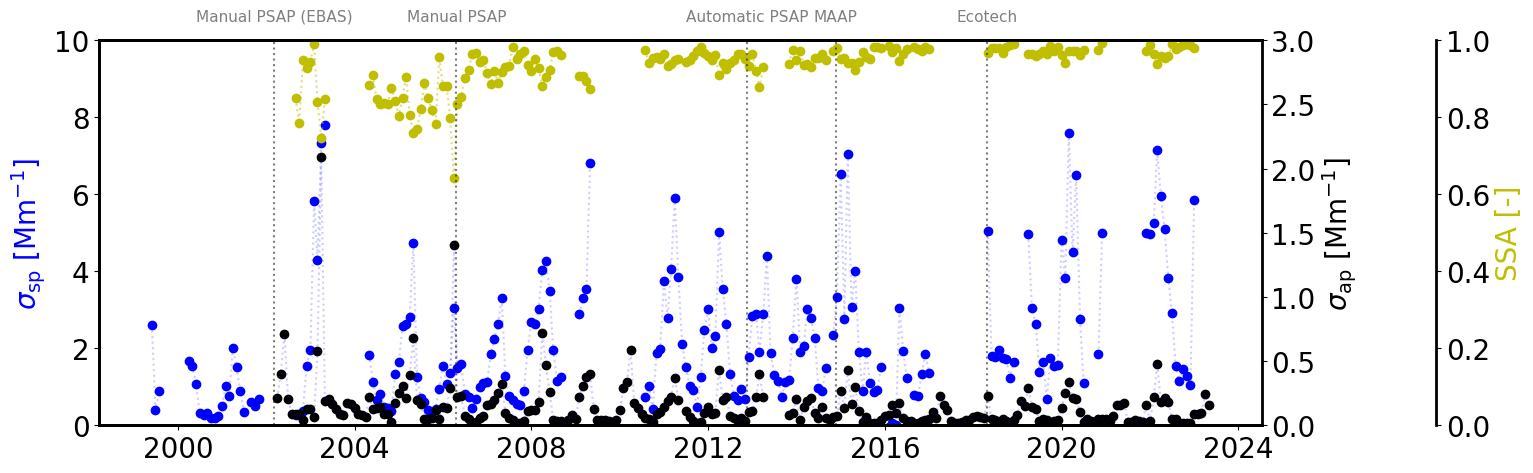

['C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\plots']
make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS9.png


In [21]:
fig = create_SSA_abs_scat_plot(df_abs_ssa_month, fontsize = 20)
save_plot(fig, savepath, name='FigureS9', formate='.png')  